# Data Exploration

## Library imports

In [2]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
import importlib 

from pathlib import Path 

In [3]:
# import other libraries 
# check if jcds library is installed
package_name = "jcds"

if importlib.util.find_spec(package_name) is None:
    print(f" '{package_name}' not found. Installing from Github... ")
    subprocess.check_call(
        [
            sys.executable,
            "-m",
            "pip",
            "install",
            "https://github.com/junclemente/jcds.git",
        ]
    )
else:
    print(f" '{package_name}' is already installed.")

from jcds import eda as jeda
from jcds import reports as jrep

 'jcds' is already installed.


## Import dataset

In [4]:
data_folder = Path("../data")

df = pd.read_pickle(data_folder / "ews_dataset.pkl")

# id_columns = ['cdscode', 'latitude', 'longitude', 'county']

# df = df.drop(columns=id_columns)

df.head()

,cdscode,county,virtual,magnet,yearroundyn,latitude,longitude,multilingual,cohortstudents,regular_hs_diploma_graduates_rate,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,1611190130229,Alameda,N,N,N,37.764958,-122.24593,N,394.0,92.4,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,1611270130450,Alameda,N,N,N,37.896661,-122.29257,N,284.0,95.1,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,1611430131177,Alameda,N,N,N,37.868913,-122.27120,Y,861.0,90.5,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,1611500132225,Alameda,N,N,N,37.705184,-122.07847,N,672.0,96.4,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,1611500133876,Alameda,V,N,N,37.713501,-122.09222,N,31.0,100.0,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


## Basic info


In [5]:
jrep.data_info(df, show_columns=True)


SHAPE:
There are 1067 rows and 46 columns (0.64 MB).

DUPLICATES:
There are 0 duplicated rows.

COLUMNS/VARIABLES:
Column dType Summary:
 * object: 5
 * int: 1
 * float: 40
There are 41 numerical (int/float/bool) variables.
 * Columns: ['cdscode', 'latitude', 'longitude', 'cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 'dropout_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'eligible_cumulative_enrollment', 'unexcused_absences_percent', 'outofschool_suspension_absences_percent', 'percent__eligible_free_k12', 'frpm_count_k12', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_inexperienced', 'pct_first_year', 'pct_second_year', 'grade_retention_ratio', 'pct_hs_enrollment', 'pct_senior_cohort', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'a

## Cardinality

In [6]:
jrep.data_cardinality(df, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 46

[BINARY COLUMNS]
There are 1 binary columns.
 * Columns: ['yearroundyn']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 3 constant columns.
 * Columns: ['high_conn', 'low_conn', 'conn_ratio']
There are 4 near-constant columns with >= 95% of values being the same.
 * Columns: ['yearroundyn', 'high_conn', 'low_conn', 'conn_ratio']

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 4 low cardinality columns with <= 10 unique values.
Columns:
 * virtual: 3 unique values
 * magnet: 3 unique values
 * yearroundyn: 2 unique values
 * multilingual: 3 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 0 high cardinality variables with >=90% unique values.


## Data Quality

In [7]:
jrep.data_quality(df, show_columns=True)

DATA QUALITY REPORT

 * Total entries (rows * cols): 49082
 * Memory usage: 0.64 MB
 * Rows: 1067
 * Columns: 46

MISSING DATA:
 * Total entries: 3179 missing (6.5%)

ROWS:
----------
 * Rows missing any: 331
 * Rows missing all: 0

DUPLICATES: 0

COLUMNS:
----------------
Columns missing any: 35
	'pct_unsafe_gr11': 172 missing (16.1%)
	'pct_safe_gr11': 172 missing (16.1%)
	'pct_neutral_gr11': 172 missing (16.1%)
	'stu_psv_ratio': 164 missing (15.4%)
	'stu_adm_ratio': 157 missing (14.7%)
	'avg_safety_score': 123 missing (11.5%)
	'school_climate_index': 123 missing (11.5%)
	'stu_tch_ratio': 97 missing (9.1%)
	'pct_associate': 96 missing (9.0%)
	'pct_bachelors': 96 missing (9.0%)
	'pct_bachelors_plus': 96 missing (9.0%)
	'pct_master': 96 missing (9.0%)
	'pct_master_plus': 96 missing (9.0%)
	'pct_doctorate': 96 missing (9.0%)
	'pct_juris_doctor': 96 missing (9.0%)
	'pct_no_degree': 96 missing (9.0%)
	'pct_experienced': 96 missing (9.0%)
	'pct_inexperienced': 96 missing (9.0%)
	'pct_first_

## Missing Data

### Heatmap of Missing Data

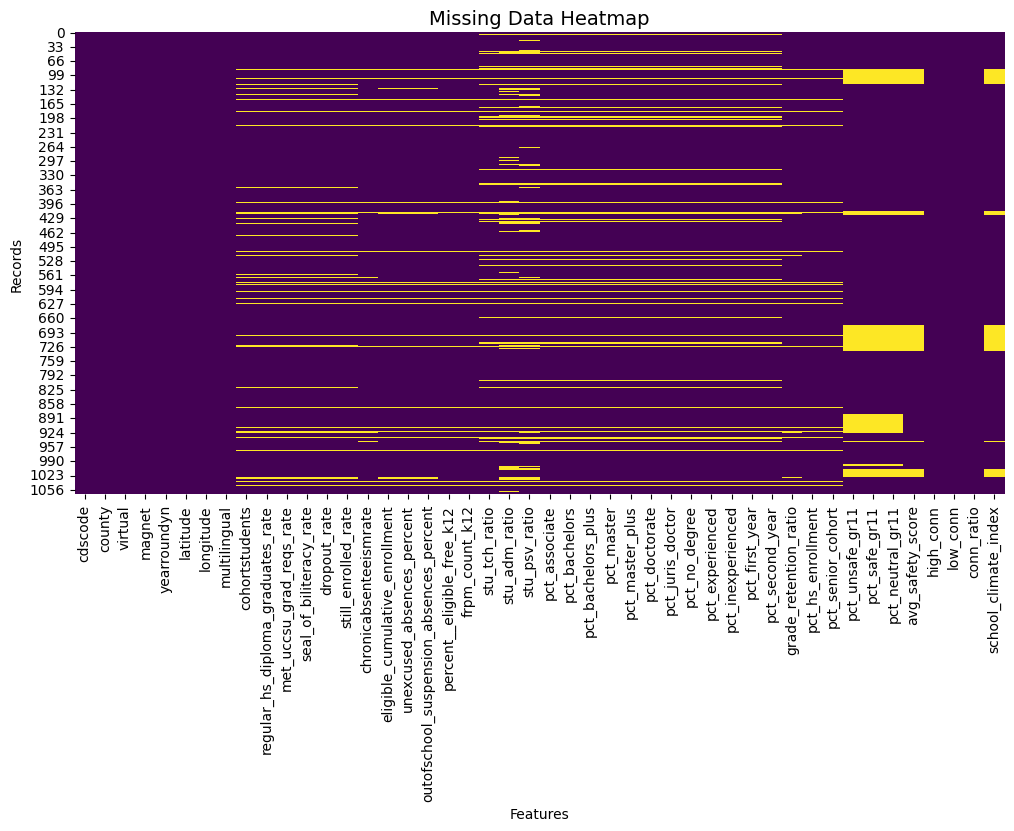

In [8]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), 
            cbar=False,
            cmap='viridis')

plt.title("Missing Data Heatmap", fontsize=14, )
plt.xlabel("Features")
plt.ylabel("Records")
plt.show()

### Data Quality of Cols Missing Data

In [9]:
missing_cols = ['county', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'stu_psv_ratio', 'stu_adm_ratio', 'avg_safety_score', 'school_climate_index']
                
jrep.data_quality(df[missing_cols],show_columns=True)

DATA QUALITY REPORT

 * Total entries (rows * cols): 8536
 * Memory usage: 0.12 MB
 * Rows: 1067
 * Columns: 8

MISSING DATA:
 * Total entries: 1083 missing (12.7%)

ROWS:
----------
 * Rows missing any: 326
 * Rows missing all: 0

DUPLICATES: 103

COLUMNS:
----------------
Columns missing any: 7
	'pct_unsafe_gr11': 172 missing (16.1%)
	'pct_safe_gr11': 172 missing (16.1%)
	'pct_neutral_gr11': 172 missing (16.1%)
	'stu_psv_ratio': 164 missing (15.4%)
	'stu_adm_ratio': 157 missing (14.7%)
	'avg_safety_score': 123 missing (11.5%)
	'school_climate_index': 123 missing (11.5%)
Column list: ['pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'stu_psv_ratio', 'stu_adm_ratio', 'avg_safety_score', 'school_climate_index']

CONSTANT: 0

NEAR CONSTANT: 0
	(95% of values are the same)

MIXED DATATYPES: 0

HIGH CARDINALITY: 0
	(60% >= unique values)


### Table of Counties with Missing Data

In [31]:
# create df showing missing % per county per column
missingness_df = (
    df.groupby('county')[missing_cols]
      .apply(lambda g: g.isnull().mean() * 100)
      .round(2)
)

# Remove counties where all values are 0%
missingness_df = missingness_df.loc[(missingness_df != 0).any(axis=1)]

print("🧭 Missingness (% by County and Variable):")
display(missingness_df)

🧭 Missingness (% by County and Variable):


,county,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,stu_psv_ratio,stu_adm_ratio,avg_safety_score,school_climate_index
county,,,,,,,,
Alameda,0.0,0.0,0.0,0.0,21.88,15.62,0.0,0.0
Butte,0.0,0.0,0.0,0.0,22.22,11.11,0.0,0.0
Calaveras,0.0,0.0,0.0,0.0,100.00,50.00,0.0,0.0
Colusa,0.0,0.0,0.0,0.0,75.00,50.00,0.0,0.0
El Dorado,0.0,0.0,0.0,0.0,33.33,33.33,0.0,0.0
Fresno,0.0,100.0,100.0,100.0,5.56,5.56,100.0,100.0
Glenn,0.0,0.0,0.0,0.0,40.00,40.00,0.0,0.0
Humboldt,0.0,0.0,0.0,0.0,44.44,44.44,0.0,0.0
Imperial,0.0,0.0,0.0,0.0,22.22,33.33,0.0,0.0


In [36]:
# counties missng 100% safety data
missing_counties = (
    missingness_df
    .loc[missingness_df['pct_neutral_gr11'] == 100]
    .index
    .to_list()
)

print(f"Total counties missing safety by grade level data: \
      {len(missing_counties)}")
print("\nCounties completely missing safety data: ")
display(missing_counties)

Total counties missing safety by grade level data:       7

Counties completely missing safety data: 


['Fresno',
 'Madera',
 'San Bernardino',
 'Santa Clara',
 'Sierra',
 'Sutter',
 'Tulare']

### Observations

Review of the columns with >10% missing values show that these features come from three datasets:
- Student - Staff Ratio
- Safety Perception by Grade
- Safety Perception by School Connectedness

Isolating just these columns, there are 1083 missing entries, or 12.7%. In this subset, we can see that there are 326 rows that are missing at least one value but none of the rows are missing all values. Overall, this could possibly suggest that there is a reporting gap and not a systemic issue where not all schools reported on the survey metrics. 

The top three columns (`pct_unsafe_gr11`, `pct_safe_gr11`, and `pct_neutral_gr11`) are each missing 16.1% of data in their columns. These variables are from the dataset on perception of safety based on grade level. There is another other column concerning safety: `avg_safety_score`. This is from another dataset focusing on safety based on connectedness. Since these are different ways of measuring the same data, we should consider dropping the data based on safety by grade level. 

There are seven counties that did not have any data for safety perception. Since these counties did not have any data for safety perception, this could possibly be a systemic reporting issue for the county. Since the lack of data represents data on certain populations, including safety as a feature may misrepresent these counties. Safety information may have to be removed when modeling that includes these counties. 

Based on these findings, missing values will be imputed using median imputation. Special consideration will be taken when including safety perception especially when including the seven counties that did not have any safety data.

In [12]:
# list features and target
target = "regular_hs_diploma_graduates_rate"

# create categorical feature of target variable
df["target_grad_category"] = np.where(
    df[target] >= 80, 
    'Graduated / On Track', 
    'Not Graduated / At Risk'
)

num_cols = df.select_dtypes(include='number').columns.to_list()

cat_cols = df.select_dtypes(exclude='number').columns.to_list()

# Univariate Analysis

## Numerical Features

In [13]:
df_num = df[num_cols].copy()

df_num.head()

,cdscode,latitude,longitude,cohortstudents,regular_hs_diploma_graduates_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,chronicabsenteeismrate,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,1611190130229,37.764958,-122.24593,394.0,92.4,73.9,22.8,2.3,1.0,12.7,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,1611270130450,37.896661,-122.29257,284.0,95.1,67.8,21.5,3.5,0.0,70.3,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,1611430131177,37.868913,-122.27120,861.0,90.5,62.3,12.1,8.1,0.8,5.2,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,1611500132225,37.705184,-122.07847,672.0,96.4,72.8,25.0,2.2,0.0,3.5,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,1611500133876,37.713501,-122.09222,31.0,100.0,64.5,6.5,0.0,0.0,8.3,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


In [14]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
cdscode,1067.0,2.944172e+13,1.387736e+13,1.611190e+12,1.964733e+13,3.066647e+13,3.773569e+13,5.872770e+13
latitude,1067.0,3.589287e+01,2.255556e+00,3.256644e+01,3.394804e+01,3.527747e+01,3.776330e+01,4.196415e+01
longitude,1067.0,-1.195766e+02,2.043445e+00,-1.242730e+02,-1.215485e+02,-1.191099e+02,-1.179264e+02,-1.143613e+02
cohortstudents,991.0,3.628375e+02,1.991024e+02,1.100000e+01,2.000000e+02,3.760000e+02,5.005000e+02,1.044000e+03
regular_hs_diploma_graduates_rate,991.0,9.186983e+01,7.276695e+00,0.000000e+00,8.930000e+01,9.380000e+01,9.660000e+01,1.000000e+02
met_uccsu_grad_reqs_rate,991.0,5.239223e+01,1.894189e+01,0.000000e+00,4.035000e+01,5.300000e+01,6.525000e+01,1.000000e+02
seal_of_biliteracy_rate,991.0,1.516670e+01,1.280911e+01,0.000000e+00,5.350000e+00,1.370000e+01,2.230000e+01,8.470000e+01
dropout_rate,991.0,4.551968e+00,4.912416e+00,0.000000e+00,1.300000e+00,3.000000e+00,6.300000e+00,3.850000e+01
still_enrolled_rate,991.0,1.590111e+00,3.668865e+00,0.000000e+00,0.000000e+00,8.000000e-01,2.000000e+00,9.630000e+01
chronicabsenteeismrate,1021.0,1.496063e+01,1.489501e+01,0.000000e+00,4.700000e+00,1.100000e+01,2.020000e+01,8.500000e+01


### Histogram and KDE Plots

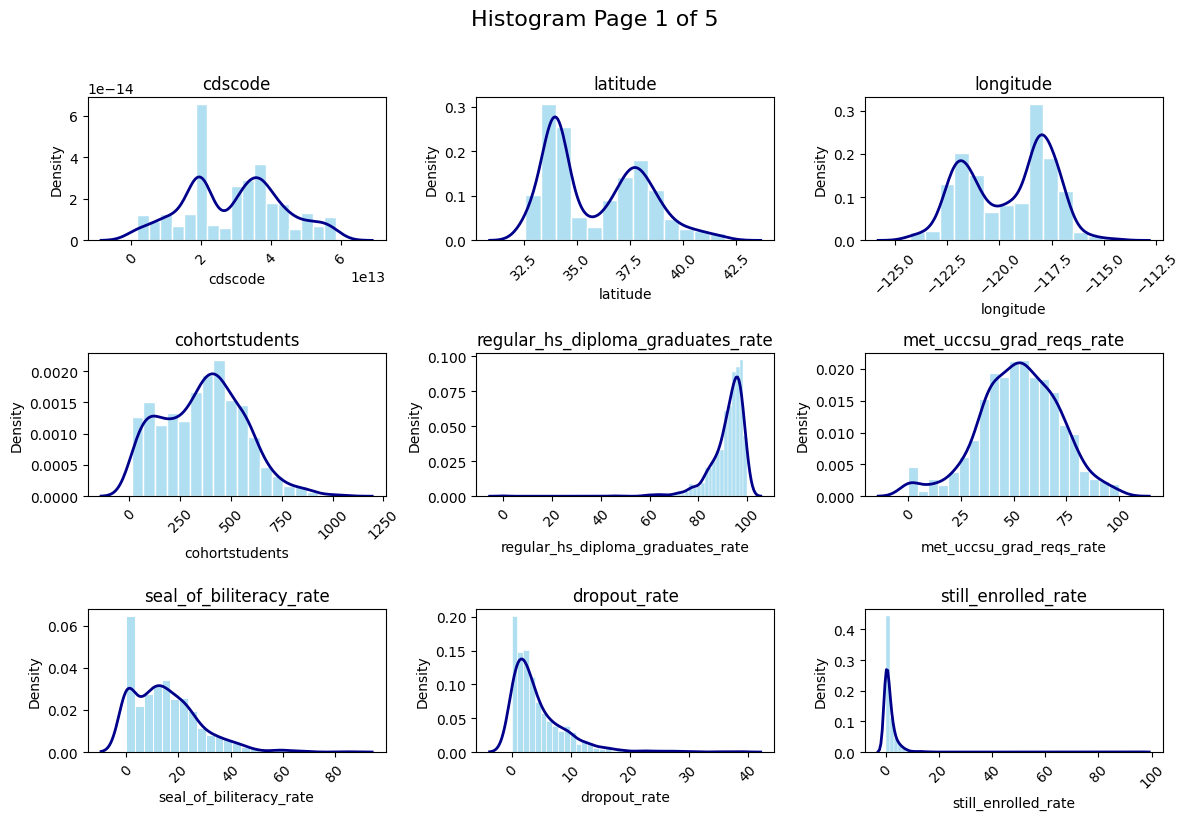

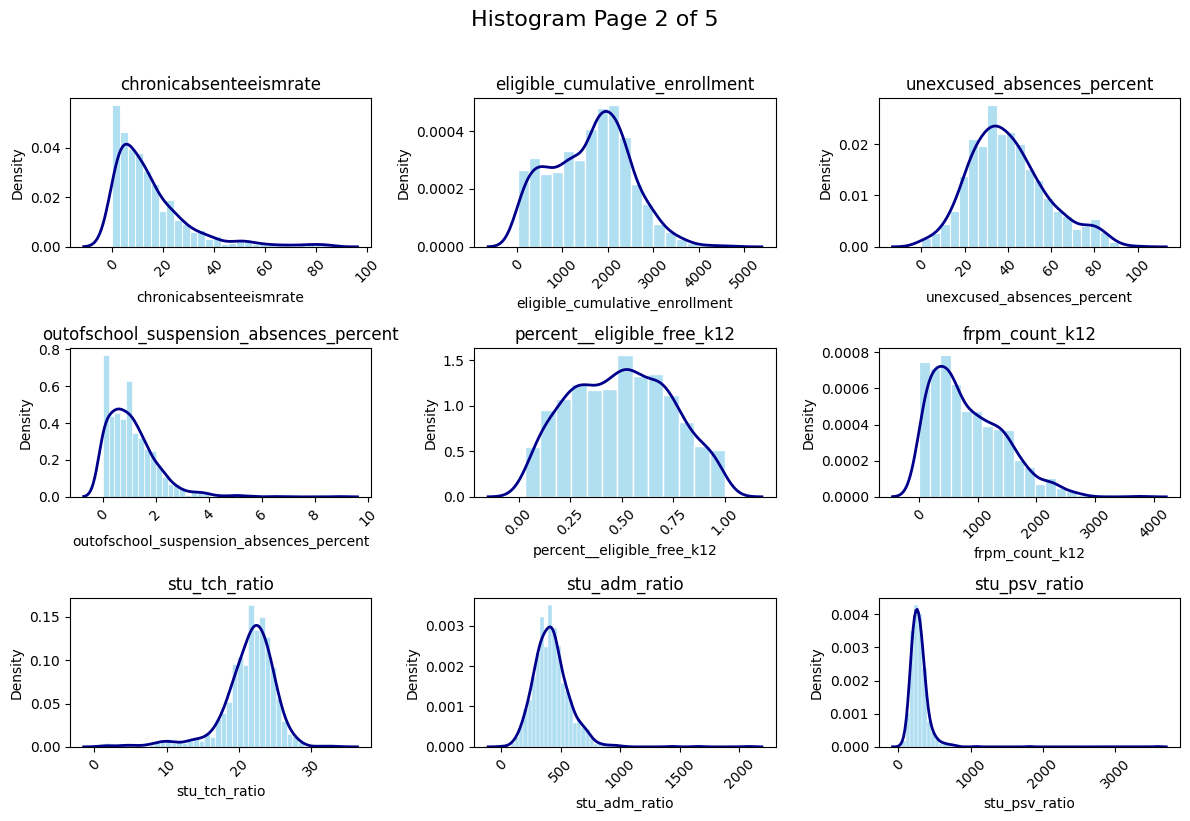

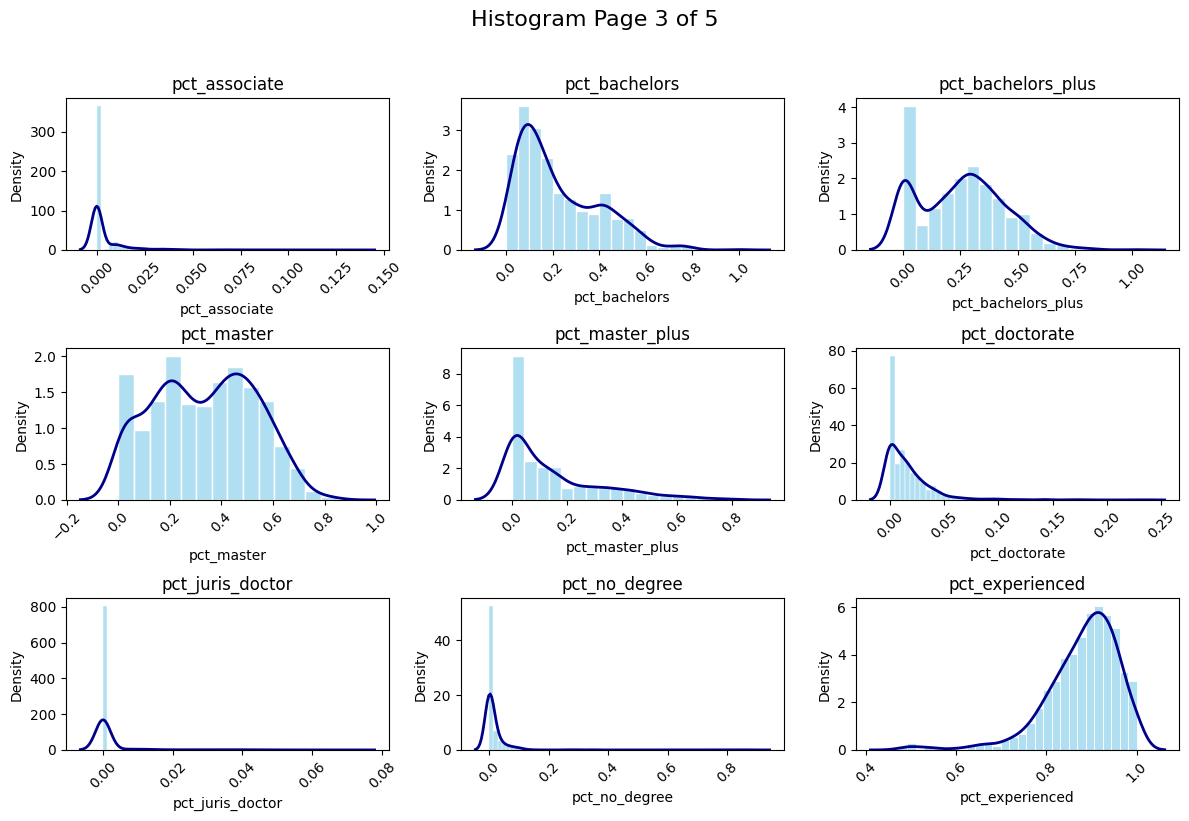

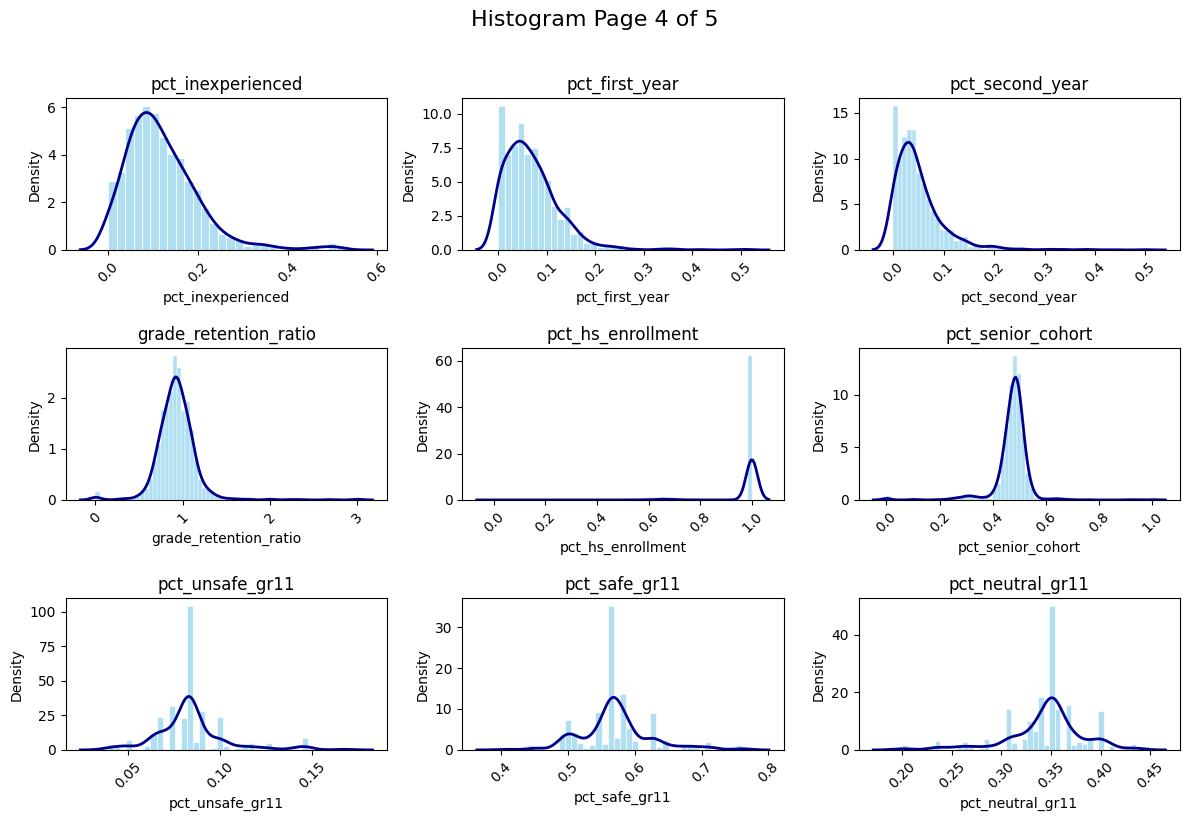

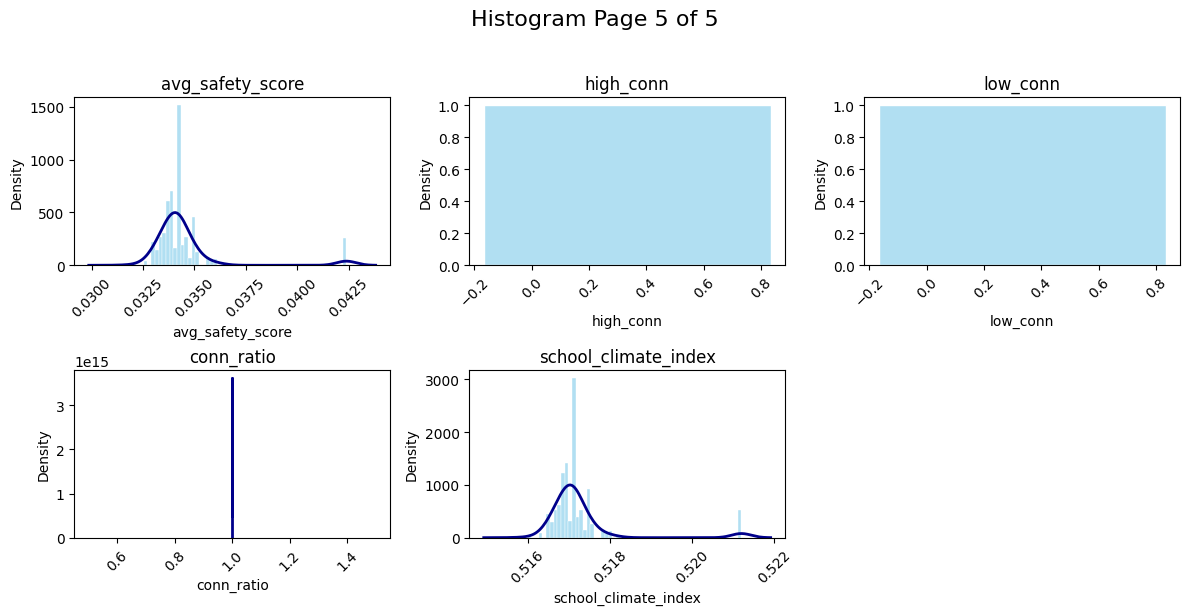

In [15]:
n_cols = 3   # columns per page
n_rows = 3   # rows per page
plots_per_page = n_cols * n_rows
num_pages = math.ceil(len(num_cols) / plots_per_page)

for page in range(num_pages):
    start = page * plots_per_page
    end = start + plots_per_page
    subset = num_cols[start:end]

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        ax=axes[i]
        sns.histplot(df[col],
                     ax=ax,
                     bins="auto", 
                     color="skyblue", 
                     alpha=0.65, 
                     stat="density",
                     edgecolor="white",
                     kde=False, 
                     )
        
        # KDE overlay
        sns.kdeplot(df[col], ax=ax, color="darkblue", linewidth=2, warn_singular=False)

        axes[i].set_title(col)
        axes[i].tick_params(axis="x", rotation=45)

    # hide unused subplots (for last page)
    for j in range(len(subset), len(axes)):
        axes[j].set_visible(False)

    plt.suptitle(f"Histogram Page {page + 1} of {num_pages}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


#### Observation

The target variable is `regular_hs_diploma_graduates_rate`. A secondary target variable is `dropout_rate`. 
The target variable is left-skewed showing that most schools have high graduation rates. This also shows there's an imbalance in our target variable. 

Most of these variables are skewed and therefore would require some transformation prior to modeling. 

The following variables do not show any variability and therefore should be removed from the dataset prior to modeling: `high_conn`, `low_conn`, and `conn_ratio`. 

The variables `latitude` and `longitude` are used only for identification and location and would not be helpful in modeling EWS. These columns should be removed prior to modeling. 


### Summary Statistics

In [16]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
cdscode,1067.0,2.944172e+13,1.387736e+13,1.611190e+12,1.964733e+13,3.066647e+13,3.773569e+13,5.872770e+13
latitude,1067.0,3.589287e+01,2.255556e+00,3.256644e+01,3.394804e+01,3.527747e+01,3.776330e+01,4.196415e+01
longitude,1067.0,-1.195766e+02,2.043445e+00,-1.242730e+02,-1.215485e+02,-1.191099e+02,-1.179264e+02,-1.143613e+02
cohortstudents,991.0,3.628375e+02,1.991024e+02,1.100000e+01,2.000000e+02,3.760000e+02,5.005000e+02,1.044000e+03
regular_hs_diploma_graduates_rate,991.0,9.186983e+01,7.276695e+00,0.000000e+00,8.930000e+01,9.380000e+01,9.660000e+01,1.000000e+02
met_uccsu_grad_reqs_rate,991.0,5.239223e+01,1.894189e+01,0.000000e+00,4.035000e+01,5.300000e+01,6.525000e+01,1.000000e+02
seal_of_biliteracy_rate,991.0,1.516670e+01,1.280911e+01,0.000000e+00,5.350000e+00,1.370000e+01,2.230000e+01,8.470000e+01
dropout_rate,991.0,4.551968e+00,4.912416e+00,0.000000e+00,1.300000e+00,3.000000e+00,6.300000e+00,3.850000e+01
still_enrolled_rate,991.0,1.590111e+00,3.668865e+00,0.000000e+00,0.000000e+00,8.000000e-01,2.000000e+00,9.630000e+01
chronicabsenteeismrate,1021.0,1.496063e+01,1.489501e+01,0.000000e+00,4.700000e+00,1.100000e+01,2.020000e+01,8.500000e+01


### Box Plots

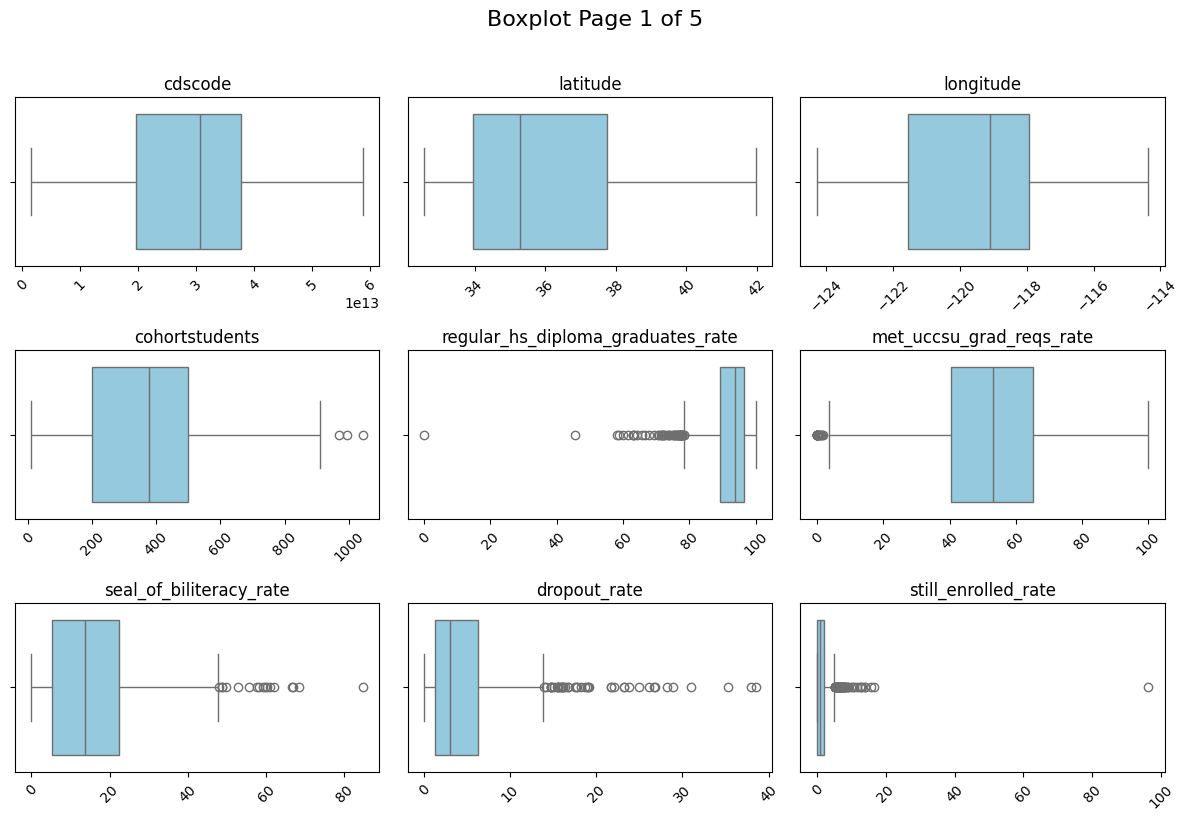

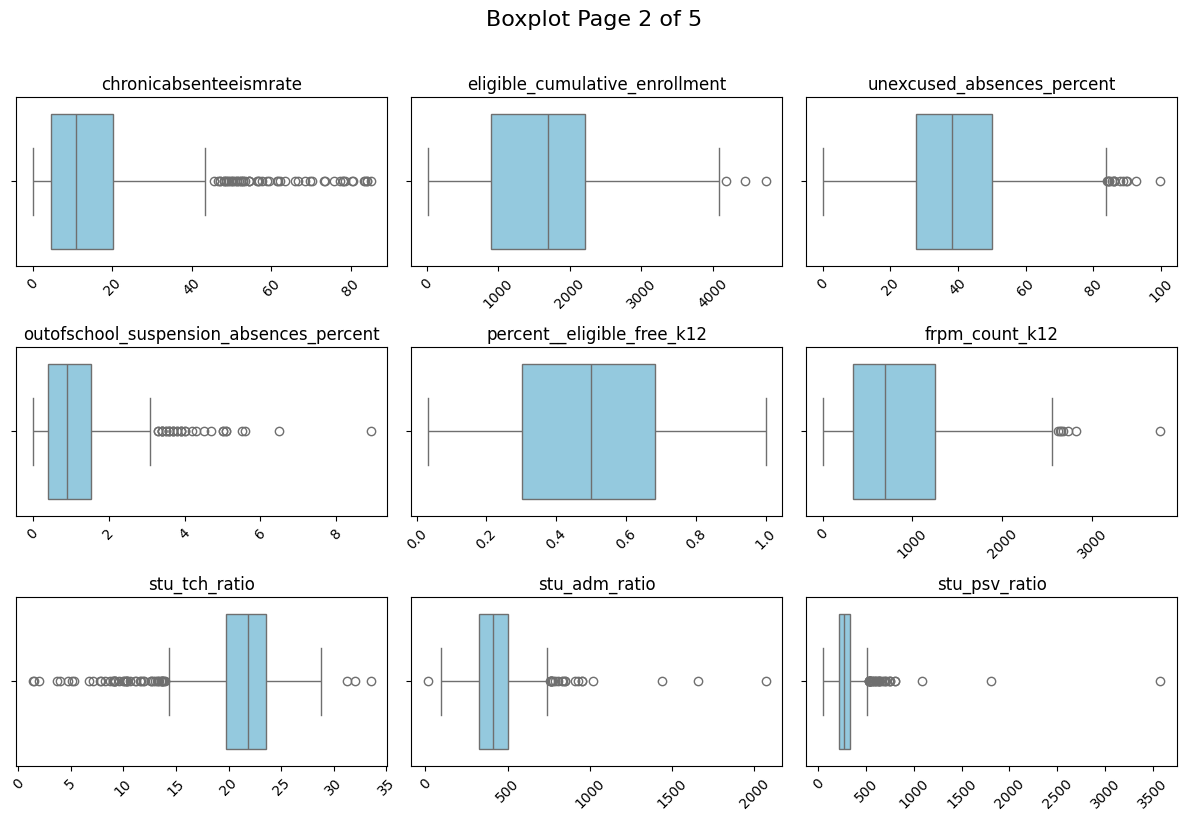

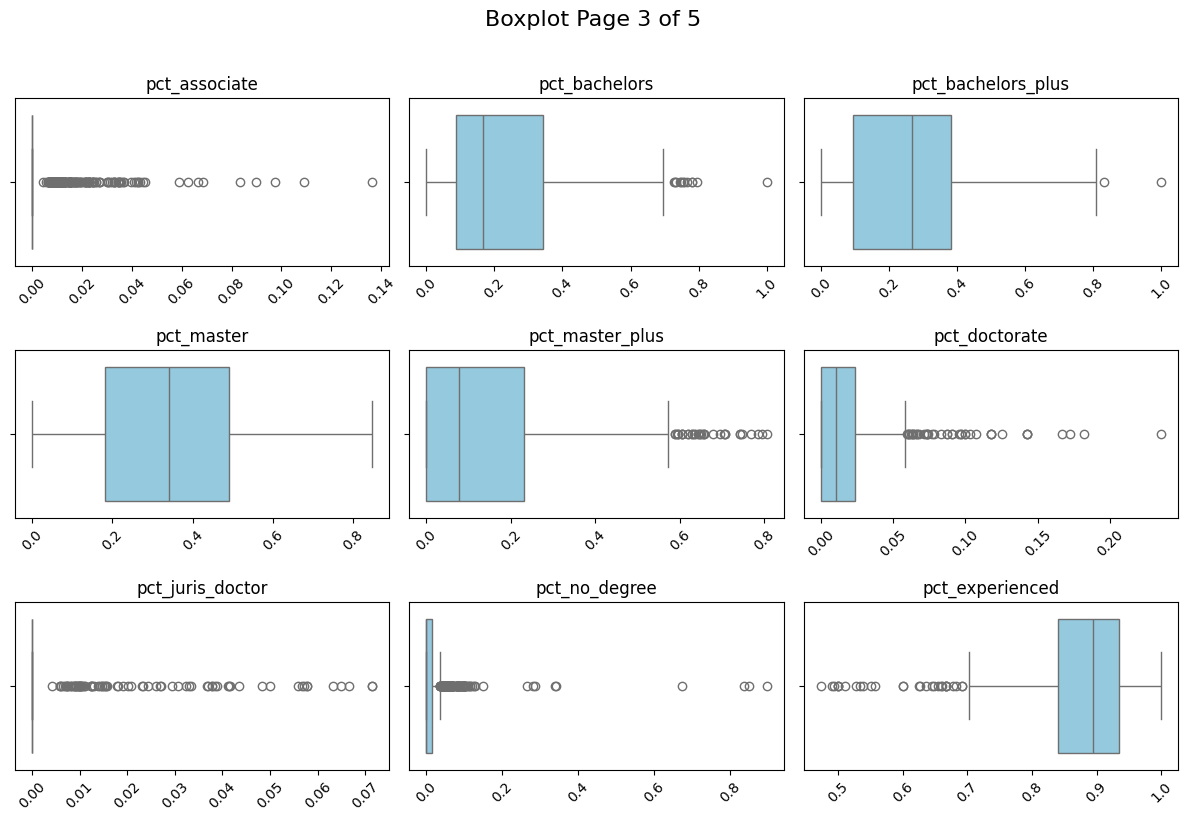

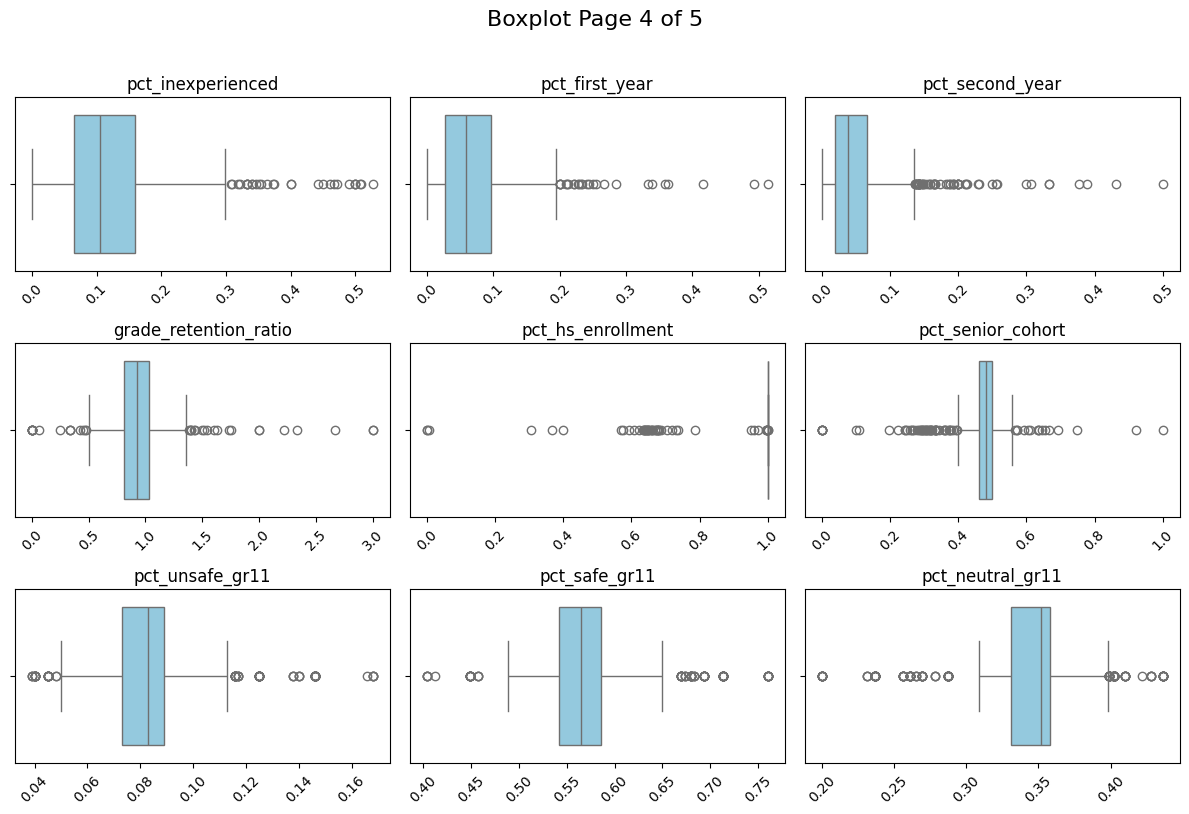

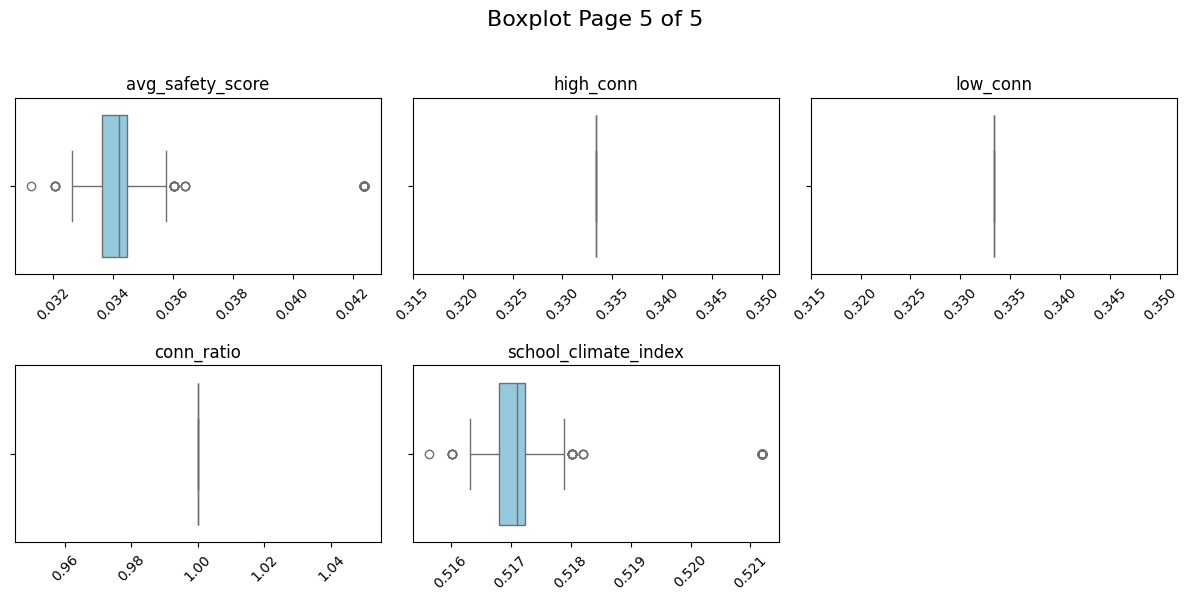

In [17]:
n_cols = 3    # number of columns per page
n_rows = 3    # number of rows per page
plots_per_page = n_cols * n_rows
num_pages = math.ceil(len(num_cols) / plots_per_page)

for page in range(num_pages):
    start = page * plots_per_page
    end = start + plots_per_page
    subset = num_cols[start:end]

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, col in enumerate(subset):
        sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis="x", rotation=45)

    # Hide any unused subplots on the last page
    for j in range(len(subset), len(axes)):
        axes[j].set_visible(False)

    plt.suptitle(f"Boxplot Page {page + 1} of {num_pages}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


### Outlier Count Summary

In [18]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
outliers.sort_values(ascending=False)

pct_associate                              201
pct_neutral_gr11                           165
pct_no_degree                              123
pct_unsafe_gr11                             89
pct_juris_doctor                            82
pct_safe_gr11                               75
pct_senior_cohort                           70
still_enrolled_rate                         65
avg_safety_score                            63
school_climate_index                        63
pct_second_year                             56
chronicabsenteeismrate                      54
stu_tch_ratio                               52
pct_hs_enrollment                           52
regular_hs_diploma_graduates_rate           48
dropout_rate                                44
pct_doctorate                               42
grade_retention_ratio                       36
outofschool_suspension_absences_percent     33
pct_master_plus                             33
stu_psv_ratio                               33
pct_experienc

In [19]:
outlier_summary = (
    outliers
    .to_frame("Outlier Count")
    .assign(Outlier_Pct=lambda x: (x["Outlier Count"] / len(df) * 100).round(2))
    .sort_values("Outlier Count", ascending=False)
)

outlier_summary.style.background_gradient(cmap="Blues").format({
    "Outlier_Pct": "{:.2f}%"
}).set_caption("Outlier Summary (Count and Percentage)")


,Outlier Count,Outlier_Pct
pct_associate,201,18.84%
pct_neutral_gr11,165,15.46%
pct_no_degree,123,11.53%
pct_unsafe_gr11,89,8.34%
pct_juris_doctor,82,7.69%
pct_safe_gr11,75,7.03%
pct_senior_cohort,70,6.56%
still_enrolled_rate,65,6.09%
avg_safety_score,63,5.90%
school_climate_index,63,5.90%


#### Observation

The outlier summary shows that there are 3 variables that have >10% outliers.

**Education**
- pct_associate: Represents % of staff with associate degrees
- pct_no_degree: Represents % of staff with no degree

**Safety**
- pct_neutral_gr11: Represents the % of 11th graders reporting feeling neither safe or unsafe

These variables show a very heavy right skew based on the histogram and density plots. Due to the shape of these distributions, these outliers do not appear to be data errors. 


## Categorical Features

In [20]:
df_cat = df[cat_cols].copy()
df_cat.head()

,county,virtual,magnet,yearroundyn,multilingual,target_grad_category
0,Alameda,N,N,N,N,Graduated / On Track
1,Alameda,N,N,N,N,Graduated / On Track
2,Alameda,N,N,N,Y,Graduated / On Track
3,Alameda,N,N,N,N,Graduated / On Track
4,Alameda,V,N,N,N,Graduated / On Track


### Cardinality Report

In [21]:
jrep.data_cardinality(df_cat, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 6

[BINARY COLUMNS]
There are 2 binary columns.
 * Columns: ['yearroundyn', 'target_grad_category']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 0 constant columns.
There are 1 near-constant columns with >= 95% of values being the same.
 * Columns: ['yearroundyn']

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 5 low cardinality columns with <= 10 unique values.
Columns:
 * virtual: 3 unique values
 * magnet: 3 unique values
 * yearroundyn: 2 unique values
 * multilingual: 3 unique values
 * target_grad_category: 2 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 0 high cardinality variables with >=90% unique values.


### Frequency and Percentage

In [22]:
for col in cat_cols: 
    print(f"\n {col.upper()}")
    display(
        pd.DataFrame({
            "Count": df_cat[col].value_counts(dropna=False),
            "Percent": (df_cat[col].value_counts(normalize=True) * 100).round(2)
        })
    )


 COUNTY


,Count,Percent
county,,
Los Angeles,214,20.06
San Diego,72,6.75
Orange,70,6.56
Riverside,62,5.81
San Bernardino,58,5.44
Santa Clara,44,4.12
Sacramento,40,3.75
Fresno,36,3.37
Kern,34,3.19



 VIRTUAL


,Count,Percent
virtual,,
N,676,63.36
C,388,36.36
V,3,0.28



 MAGNET


,Count,Percent
magnet,,
N,937,87.82
Y,105,9.84
No Data,25,2.34



 YEARROUNDYN


,Count,Percent
yearroundyn,,
N,1014,95.03
Y,53,4.97



 MULTILINGUAL


,Count,Percent
multilingual,,
N,919,86.13
Y,122,11.43
No Data,26,2.44



 TARGET_GRAD_CATEGORY


,Count,Percent
target_grad_category,,
Graduated / On Track,933,87.44
Not Graduated / At Risk,134,12.56


### Count Plots

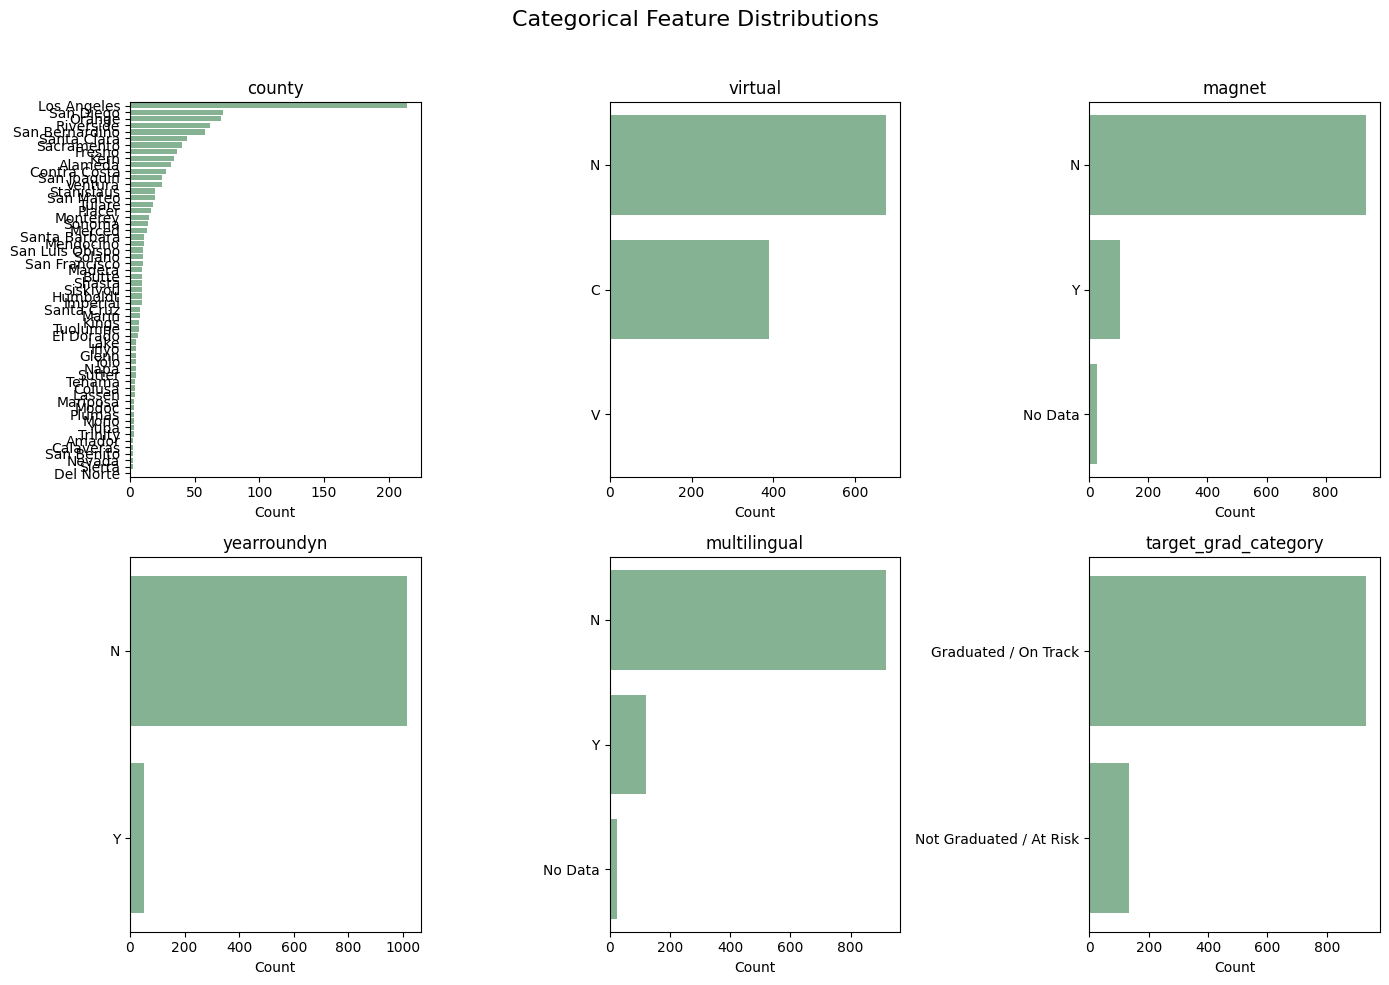

In [23]:
n_cols = 3
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(
        y=col,
        data=df_cat,
        order=df_cat[col].value_counts().index,
        color=sns.color_palette("crest")[0],   # <--- fixed
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("")

for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Categorical Feature Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



In [24]:
df_cat.describe().T

,count,unique,top,freq
county,1067,57,Los Angeles,214
virtual,1067,3,N,676
magnet,1067,3,N,937
yearroundyn,1067,2,N,1014
multilingual,1067,3,N,919
target_grad_category,1067,2,Graduated / On Track,933


#### Observation

The `county` variable is only used for identification and should be removed prior to modeling.   
Most of the schools do not offer `virtual` instruction. Some offer combined but only 3 schools provide full time virtual instruction.   
Majority of the schools identify as non-`magnet` schools with 25 schools having no data. This appears to be a reporting gap instead of missing at random.   
Majority of school do not identify as `multilingual`. There are 26 schools that have no data. This also appears to be a reporting gap instead of missing at random.   
The majority of schools also do not identify as `yearroundyn`.   


### Feature Summary

In [25]:
cat_summary = pd.DataFrame({
    "Unique Categories": df[cat_cols].nunique(),
    "Most Frequent Category": df[cat_cols].mode().iloc[0],
    "Missing Values": df[cat_cols].isna().sum()
})

cat_summary.style.background_gradient(cmap="Greens").set_caption("Categorical Feature Summary")


,Unique Categories,Most Frequent Category,Missing Values
county,57,Los Angeles,0
virtual,3,N,0
magnet,3,N,0
yearroundyn,2,N,0
multilingual,3,N,0
target_grad_category,2,Graduated / On Track,0


/tmp/ipykernel_5064/321096384.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_grad_category', data=df, palette=['skyblue', 'salmon'])


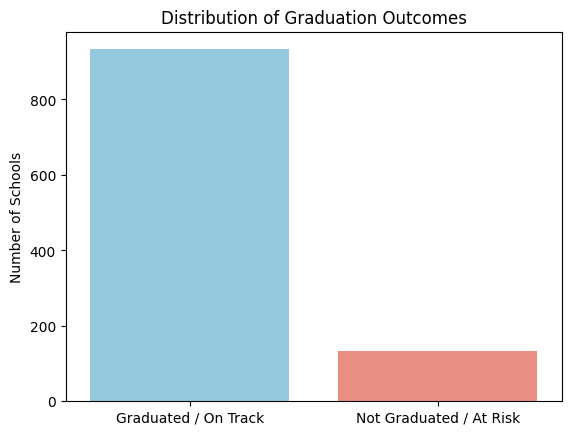

target_grad_category
Graduated / On Track       87.44
Not Graduated / At Risk    12.56
Name: proportion, dtype: float64

In [26]:
sns.countplot(x='target_grad_category', data=df, palette=['skyblue', 'salmon'])
plt.title("Distribution of Graduation Outcomes")
plt.xlabel("")
plt.ylabel("Number of Schools")
plt.show()

df['target_grad_category'].value_counts(normalize=True).mul(100).round(2)


#### Observation

For our target variable, there is a large class imbalance with 87% of the results being 'Graduated / On Track'. This will be addressed during modeling with resampling techniques to ensure at-risk schools are properly represented in predictive performance. 

## Comments
### Tanya Review:


A bunch of these columns literally don’t change (charter, eilcode, yearround, etc). they’re not gonna help any model, so we can drop those later.

the high-cardinality stuff (cdscode, latitude, longitude) isn’t useful for modeling either. we can keep lat/long just for mapping in the app, but not for the model.

some features have missing data… like 90%+ missing. those are basically unusable, so we should remove them. the ones with like 5–15% missing we can probably impute.

most numeric variables are super skewed (absences, FRPM, dropout). kinda expected for school data tbh. tree models won’t care, but linear models will. just something to note.

some grad-rate features have mixed types + missing values. we need to clean those but some might be duplicates of each other.

poverty indicators (FRPM) are important but super skewed. might need to choose only one of those instead of keeping all versions of the same thing.

absenteeism features are messy but definitely will need for EWS, so we should clean them and keep them.

## Next Steps:

1. finish the bivariate analysis so we can see which features actually relate to grad rates

2. flag any features that are highly correlated or redundant so we don’t keep duplicates in the model

3. make a short list of “keep vs drop” features based on variability + missingness

4. clean the mixed-type columns (the rate fields that came in as strings)

5. finalize how we want to handle missing values (drop vs impute)

6. once the cleaned feature list is locked in, I can start building the modeling pipeline